# CHAPTER 05. 이산형 확률변수

In [1]:
# from google.colab import drive
# drive.mount('/content/mydrive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 주피터 환경 전용
%precision 3
%matplotlib inline

# 코랩 환경도 적용
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.3f}'.format

## 1차원 이산형 확률변수

In [3]:
# 주사위의 가능한 결과(눈금)를 나타내는 배열 생성
# 통계에서, 이러한 결과들을 표본 공간의 원소라고 부릅니다.
# 즉, 주사위를 던질 때 나올 수 있는 모든 결과를 나열한 것입니다.
x_set = np.array([1, 2, 3, 4, 5, 6])

In [4]:
def f(x):
    # x가 x_set(주사위의 가능한 눈금)에 포함되어 있다면
    if x in x_set:
        # 확률 값을 반환합니다. 여기서는 x/21이라는 규칙을 따르는데,
        # 이는 각 눈금의 확률을 특정한 방식으로 나타내려고 함을 의미합니다.
        # 예를 들어, x=1일 때 확률은 1/21, x=2일 때 확률은 2/21로 계산됩니다.
        return x / 21
    else:
        # x가 x_set에 포함되어 있지 않다면 확률은 0입니다.
        # 즉, 주사위의 눈금 외의 다른 결과에 대한 확률은 0이라고 가정하는 것입니다.
        return 0

In [5]:
# 확률 변수 X를 정의합니다.
# X는 2개의 요소로 구성된 리스트입니다.
# 첫 번째 요소 x_set은 확률 변수 X가 취할 수 있는 모든 가능한 값들의 집합(표본 공간)을 나타냅니다.
# 두 번째 요소 f는 확률 질량 함수(PMF)로, x_set에 있는 특정 값 x에 대한 확률을 반환합니다.
X = [x_set, f]

In [6]:
# 확률 변수 X가 취할 수 있는 각 값 x_k에 대한 확률 p_k를 계산합니다.
# 여기서 f는 확률 질량 함수(probability mass function, PMF)로, 
# 주어진 x_k에 대한 확률 값을 반환합니다.
prob = np.array([f(x_k) for x_k in x_set])

# 각 확률 변수의 값 x_k와 그에 대응하는 확률 p_k를 사전(dictionary) 형태로 만듭니다.
# 이렇게 하면 x_k 값을 key로 사용하여 해당 확률 p_k를 쉽게 찾을 수 있습니다.
dict(zip(x_set, prob))

# 결과적으로 dict_mapping은 x_k와 p_k의 대응 관계를 나타내는 사전입니다.

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

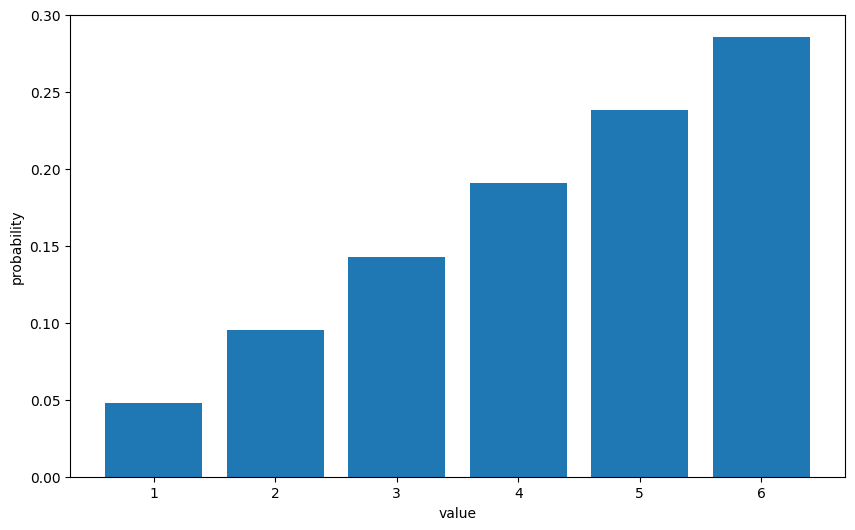

In [7]:
# plt.figure를 통해 그래프의 전체 크기와 모양을 정의합니다.
# figsize는 그래프의 크기를 정의하는 튜플입니다. 여기서는 가로 10 인치, 세로 6 인치 크기로 설정되었습니다.
fig = plt.figure(figsize=(10, 6))

# fig.add_subplot(111)을 통해 1x1 그리드의 첫 번째 서브 플롯을 생성합니다.
# ax는 이 서브플롯에 대한 참조입니다. 이 참조를 사용하여 서브플롯에 다양한 설정을 할 수 있습니다.
ax = fig.add_subplot(111)

# ax.bar는 막대 그래프를 그리는 함수입니다. 
# x_set에는 이산형 확률 변수가 취할 수 있는 값들이, prob에는 해당 값들의 확률이 저장되어 있습니다.
# 따라서 x_set와 prob에 저장된 값을 사용하여 확률 분포를 막대 그래프로 표현합니다.
ax.bar(x_set, prob)

# x축과 y축의 라벨을 설정합니다.
# 여기서 x축은 확률 변수가 취할 수 있는 값들을, y축은 그 값들의 확률을 나타냅니다.
ax.set_xlabel('value')
ax.set_ylabel('probability') # 'probability'는 확률을 의미합니다.

# 그래프를 화면에 표시합니다.
plt.show()

In [8]:
# `np.all` 함수는 배열 내의 모든 요소가 주어진 조건을 만족하는지 검사합니다.
# 여기서는 `prob >= 0`이라는 조건을 사용하여 prob 배열의 모든 값이 0 또는 0보다 큰지 검사합니다.
# 결과는 True 또는 False로 반환됩니다.
# True: prob 배열의 모든 요소가 0 이상입니다. (이상적으로 확률 분포의 요소들은 모두 0 이상이어야 합니다.)
# False: prob 배열에 0보다 작은 값이 하나 이상 포함되어 있습니다. (이는 확률 분포로서 유효하지 않습니다.)
np.all(prob >= 0)

True

In [9]:
# `prob` 배열(또는 리스트)의 모든 원소들의 합을 계산하고,
# 주로 `prob`가 확률 분포를 나타내는 경우, 그 합이 1에 가까운지 확인하는 데 사용될 수 있다.
np.sum(prob)

1.000

In [10]:
def F(x):
    # `x_set`에서 x 이하의 모든 값을 대상으로 확률 질량 함수 f를 적용하고,
    # 그 결과들의 합을 반환한다. 이로써 누적 분포 함수의 값을 얻는다.
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [11]:
# `F`는 누적 분포 함수이므로, `F(3)`은 확률 변수 X의 값이 3 이하일 확률을 반환한다.
F(3)

0.286

In [12]:
# `x_set`의 각 원소에 선형 변환 2x + 3을 적용하여 y_set을 생성한다.
y_set = np.array([2 * x_k + 3 for x_k in x_set])

# `x_set`의 각 원소에 확률 질량 함수 f를 적용하여 해당 원소의 확률을 얻는다.
prob = np.array([f(x_k) for x_k in x_set])

# y_set의 값과 해당 확률을 쌍으로 묶어 딕셔너리 형태로 반환한다.
# 이 딕셔너리는 확률 변수 Y의 확률 분포를 나타낸다.
y_prob_distribution = dict(zip(y_set, prob))

In [13]:
# `x_set`의 각 원소에 대해 해당 원소의 값과 그 원소의 확률을 곱하고,
# 그 결과들의 합을 계산하여 확률 변수 X의 기대값(또는 평균)을 반환한다.
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [14]:
# `x_set`에서 주어진 확률 분포 `prob`를 기반으로 1,000,000개의 표본을 무작위로 추출한다.
sample = np.random.choice(x_set, int(1e6), p=prob)

# 추출된 표본들의 평균 값을 계산한다.
np.mean(sample)

4.332

In [15]:
def E(X, g=lambda x: x):
    """
    확률변수 X의 기댓값을 계산하는 함수.

    Parameters:
    - X (tuple): 확률변수 X의 정의. 
                 X는 (x_set, f)의 튜플 형태로 주어져야 합니다.
                 x_set은 확률변수 X가 취할 수 있는 값들의 집합, 
                 f는 그 값들에 대한 확률질량함수를 나타냅니다.
    - g (function, optional): g(x)는 확률변수 X에 대한 함수로, 
                              기본적으로 항등함수로 설정됩니다.

    Returns:
    - float: g(X)의 기댓값. 

    예시:
    X가 다음과 같이 주어질 경우:
    x_set = {1, 2, 3}
    f = {1: 0.2, 2: 0.5, 3: 0.3}
    E(X)는 1*0.2 + 2*0.5 + 3*0.3 = 2.1을 반환합니다.
    """

    # X에서 x_set(값들의 집합)과 f(확률질량함수)를 추출합니다.
    x_set, f = X

    # 각 값 x_k에 대해 함수 g를 적용한 후, 그 결과에 확률 f(x_k)를 곱합니다.
    # 이렇게 계산된 모든 값을 합하여 기댓값을 반환합니다.
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [16]:
E(X)

4.333

In [17]:
# E 함수를 호출하여 확률변수 X의 기댓값을 계산합니다.
# 여기서 주어진 함수 g는 확률변수 X의 각 값에 2를 곱하고 3을 더하는 변환을 의미합니다.
# 즉, 이 코드는 확률변수 X의 각 값에 대해 2x + 3 변환을 적용한 후 그 변환된 값들의 기댓값을 계산하려는 것입니다.
E(X, g=lambda x: 2*x + 3)

11.667

In [18]:
2 * E(X) + 3

11.667

In [19]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [20]:
# E(X)는 확률변수 X의 기댓값을 계산합니다. 
# 기댓값은 확률변수의 "평균적인" 값을 나타내는 통계적 척도입니다.
# 여기서는 그 기댓값에 2를 곱하고 3을 더하는 연산을 수행합니다.
result = 2 * E(X) + 3

In [21]:
def V(x, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [22]:
V(X)

2.222

In [23]:
V(X, lambda x: 2*x +3)

8.889

In [24]:
2**2 * V(X)

8.889

## 2차원 이산형 확률변수

In [25]:
# X 확률 변수가 취할 수 있는 값의 집합을 생성합니다.
# 여기서는 2부터 12까지의 정수 값을 포함하는 배열입니다.
x_set = np.arange(2, 13)

# Y 확률 변수가 취할 수 있는 값의 집합을 생성합니다.
# 여기서는 1부터 6까지의 정수 값을 포함하는 배열입니다.
y_set = np.arange(1, 7)

In [26]:
def f_XY(x, y):
    
    # x와 y가 모두 특정 조건을 만족할 때 확률 값을 계산합니다.
    # 여기서 y는 1과 6 사이의 값을 가져야 하며, x-y도 1과 6 사이의 값을 가져야 합니다.
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        
        # 확률 질량 함수의 값을 계산하여 반환합니다.
        # y와 (x-y)를 곱한 값에 441로 나누어 확률 값을 구합니다.
        # 이 확률 값은 주사위 두 개를 던졌을 때의 합과 관련이 있을 수 있습니다.
        # 예를 들어, (x, y) = (3, 1)일 때, 첫 번째 주사위에서 1, 두 번째 주사위에서 2가 나와서 합이 3이 될 확률을 계산합니다.
        return y * (x - y) / 441
        
    else:
        
        # 만약 x와 y가 주어진 조건을 만족하지 않는다면 확률은 0입니다.
        return 0

In [27]:
# 결합 확률 질량 함수 f_XY를 정의합니다.
# 이 함수는 이전 코드 블록에서 정의되었습니다.

# XY는 확률 변수 X와 Y, 그리고 이들의 결합 확률 질량 함수를 포함하는 리스트입니다.
# 이 구조를 사용하여 두 확률 변수의 확률 분포 및 통계적 특성을 분석할 수 있습니다.
XY = [x_set, y_set, f_XY]

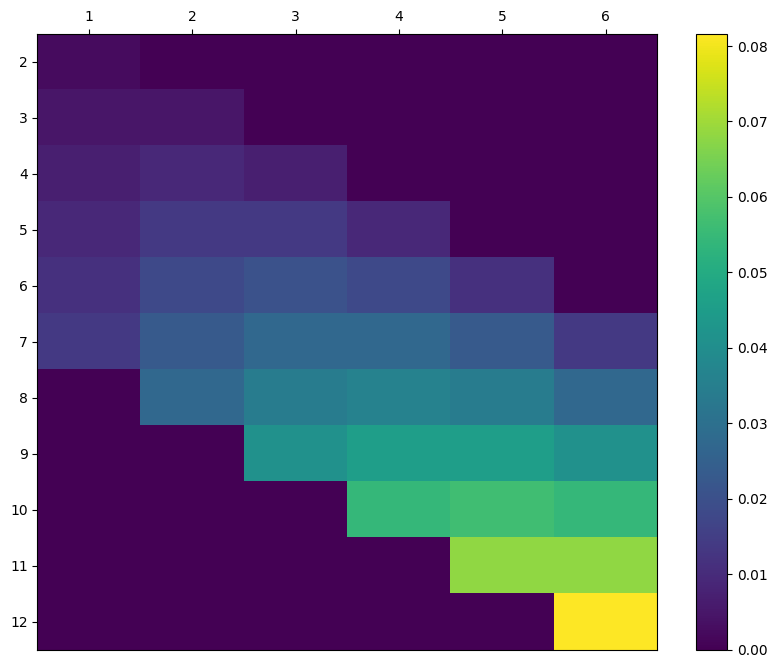

In [28]:
# 확률 변수 X와 Y의 결합 확률 분포를 계산합니다.
# prob는 각 (x, y) 쌍에 대한 확률 값을 포함하는 2차원 배열입니다.
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

# 확률 분포를 시각화하기 위해 matplotlib의 pyplot을 사용합니다.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# prob 배열의 값에 따라 색상을 지정하여 2차원 확률 분포를 시각화합니다.
c = ax.pcolor(prob)

# x축과 y축에 눈금을 설정합니다. 
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)

# x축과 y축에 레이블을 설정합니다.
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

# y축의 숫자를 역순으로 표시합니다.
ax.invert_yaxis()

# x축 눈금을 그래프의 위쪽에 표시합니다.
ax.xaxis.tick_top()

# 색상 막대를 그래프에 추가하여, 색상이 확률 값을 어떻게 나타내는지 표시합니다.
fig.colorbar(c, ax=ax)

# 그래프를 표시합니다.
plt.show()

In [29]:
np.all(prob >= 0)

True

In [30]:
np.sum(prob)

1.000

In [31]:
# 이 함수는 주변 확률분포(marginal probability distribution)를 계산하기 위한 함수입니다.
def f_X(x):
    
    # f_XY(x, y)는 x와 y의 결합 확률분포(joint probability distribution)를 나타냅니다.
    # 여기서는 x 값이 주어졌을 때, 모든 y 값에 대한 확률을 합산하여
    # x만의 확률을 계산하는 것입니다.
    
    # 리스트 내포를 사용하여 y_set의 모든 y_k 값에 대해 f_XY(x, y_k)를 계산하고
    # 그 결과를 합산(np.sum)하여 반환합니다.
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [32]:
# f_Y 함수는 주어진 y 값에 대한 결합 확률 분포 f_XY의 주변 확률 분포를 계산하는 함수입니다.
def f_Y(y):
    
    # x_set 내의 각 x 값에 대해 f_XY(x, y)를 계산하고,
    # 그 결과들의 합을 반환하여 Y 확률 변수의 특정 값 y에 대한 확률을 얻습니다.
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [33]:
# X는 X 확률 변수와 관련된 정보를 담는 리스트입니다.
# X[0]은 X 확률 변수가 취할 수 있는 모든 값의 집합을 포함하고 있습니다.
# X[1]은 X 확률 변수의 특정 값에 대한 확률을 반환하는 함수 f_X를 포함하고 있습니다.
X = [x_set, f_X]

# Y는 Y 확률 변수와 관련된 정보를 담는 리스트입니다.
# Y[0]은 Y 확률 변수가 취할 수 있는 모든 값의 집합을 포함하고 있습니다.
# Y[1]은 Y 확률 변수의 특정 값에 대한 확률을 반환하는 함수 f_Y를 포함하고 있습니다.
Y = [y_set, f_Y]

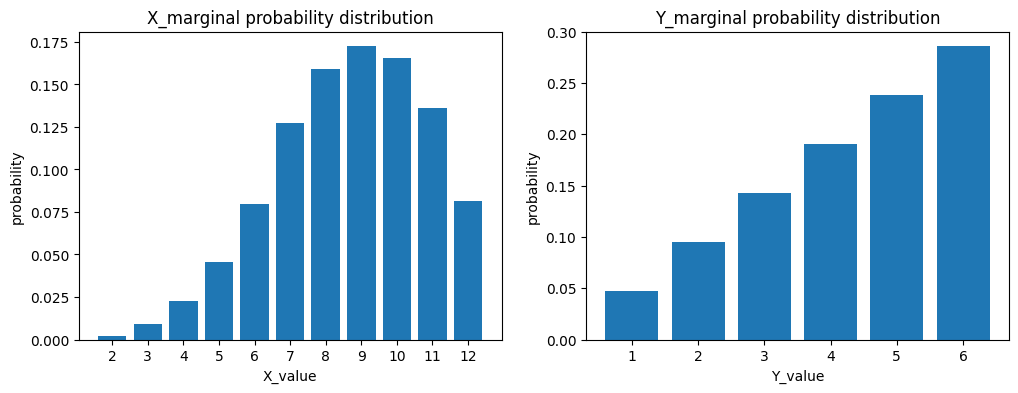

In [60]:
# X 확률 변수의 주변 확률 분포를 계산합니다.
# x_set 내의 각 값에 대한 확률 값을 배열로 생성합니다.
prob_x = np.array([f_X(x_k) for x_k in x_set])

# Y 확률 변수의 주변 확률 분포를 계산합니다.
# y_set 내의 각 값에 대한 확률 값을 배열로 생성합니다.
prob_y = np.array([f_Y(y_k) for y_k in y_set])

# 그래프의 크기를 설정하고 두 개의 서브플롯을 생성합니다.
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 첫 번째 서브플롯(ax1)에 X 확률 변수의 주변 확률 분포를 막대 그래프로 표시합니다.
ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')  # 그래프 제목 설정
ax1.set_xlabel('X_value')  # x축 라벨 설정
ax1.set_ylabel('probability')  # y축 라벨 설정
ax1.set_xticks(x_set)  # x축 눈금 설정

# 두 번째 서브플롯(ax2)에 Y 확률 변수의 주변 확률 분포를 막대 그래프로 표시합니다.
ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')  # 그래프 제목 설정
ax2.set_xlabel('Y_value')  # x축 라벨 설정
ax2.set_ylabel('probability')  # y축 라벨 설정

# 두 개의 서브플롯을 함께 표시합니다.
plt.show()

In [61]:
# 주어진 결합 확률밀도함수 f_XY(x, y)를 사용하여 X의 기대값을 계산합니다.
# 이를 위해 각 x_i 값과 그에 해당하는 f_XY(x_i, y_j) 값을 곱한 후 모두 합합니다.
# 이때, 모든 가능한 x_i와 y_j 조합을 고려합니다.

expected_value = np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [62]:
# E 함수는 두 확률변수 X, Y의 결합 확률밀도함수와 임의의 함수 g를 입력으로 받아서,
# g의 기대값을 계산하는 함수입니다.

def E(XY, g):
    
    # XY는 [x_set, y_set, f_XY] 형태의 리스트입니다.
    # x_set, y_set은 각각 확률변수 X와 Y가 취할 수 있는 값의 집합을 의미하고,
    # f_XY는 X와 Y의 결합 확률밀도함수를 의미합니다.
    x_set, y_set, f_XY = XY

    # g(x_i, y_j)는 x_i와 y_j에 대한 g의 값이며,
    # f_XY(x_i, y_j)는 x_i와 y_j에서의 결합 확률밀도함수의 값을 의미합니다.
    # 이 두 값을 곱하고 모든 가능한 x_i와 y_j 조합에 대해 합을 계산하여 
    # g의 기대값을 반환합니다.
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [63]:
# mean_X는 확률변수 X의 평균(기대값)을 나타냅니다.
# 람다 함수 lambda x, y: x는 (x, y) 쌍에서 x 값을 반환하는 함수입니다.
# 따라서 E 함수에 이 람다 함수를 전달하면, X의 기대값을 계산하게 됩니다.
mean_X = E(XY, lambda x, y: x)

mean_X  # X의 평균(기대값)을 출력합니다.

8.667

In [64]:
# mean_Y는 확률변수 Y의 평균(기대값)을 나타냅니다.
# 람다 함수 lambda x, y: y는 (x, y) 쌍에서 y 값을 반환하는 함수입니다.
# 따라서 E 함수에 이 람다 함수를 전달하면, Y의 기대값을 계산하게 됩니다.
mean_Y = E(XY, lambda x, y: y)

mean_Y  # Y의 평균(기대값)을 출력합니다.

4.333

In [65]:
# a와 b는 상수로 주어집니다.
a, b = 2, 3

In [66]:
# 이 코드는 함수 a*x + b*y에 대한 결합 확률변수 XY의 기대값을 계산합니다.
# 여기서 람다 함수 lambda x, y: a*x + b*y는 각 (x, y) 쌍에 대해 a*x + b*y 값을 반환합니다.
E(XY, lambda x, y: a*x + b*y)

30.333

In [67]:
# f_Y 함수는 확률 변수 Y의 주변 확률 질량 함수 (pmf)를 계산하는 함수입니다.
def f_Y(y):
    
    # 주변 확률 질량 함수 f_Y(y)는 결합 확률 질량 함수 f_XY(x, y)를 x의 모든 가능한 값에 대해 합산함으로써 계산됩니다.
    # 따라서, 아래의 코드는 x_set 내의 각 x_k에 대한 f_XY(x_k, y)의 값을 합산하여 Y=y일 확률을 반환합니다.
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [68]:
# 확률 변수 X와 Y를 정의하기 위한 코드입니다.

# X는 두 개의 요소로 구성된 리스트입니다.
# 첫 번째 요소 x_set은 확률 변수 X가 취할 수 있는 모든 가능한 값을 포함하는 배열입니다.
# 두 번째 요소 f_X는 확률 변수 X의 주변 확률 질량 함수 (pmf)를 나타내는 함수입니다.
X = [x_set, f_X]

# Y는 두 개의 요소로 구성된 리스트입니다.
# 첫 번째 요소 y_set은 확률 변수 Y가 취할 수 있는 모든 가능한 값을 포함하는 배열입니다.
# 두 번째 요소 f_Y는 확률 변수 Y의 주변 확률 질량 함수 (pmf)를 나타내는 함수입니다.
Y = [y_set, f_Y]

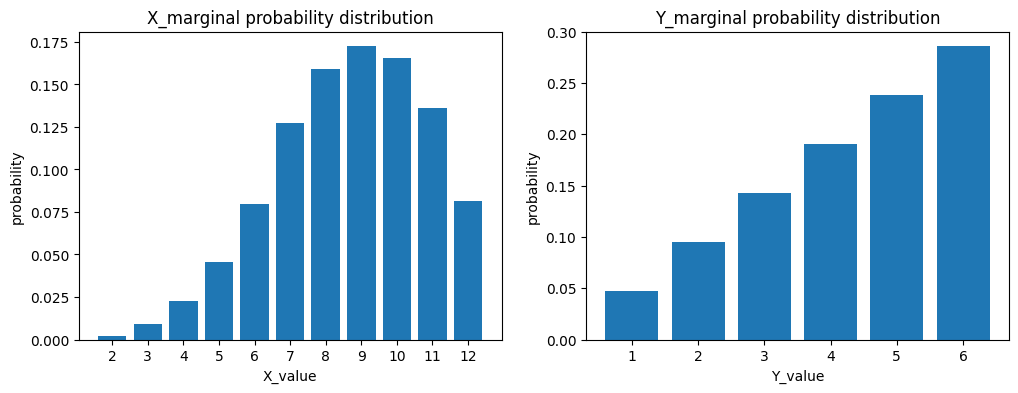

In [69]:
# 확률 변수 X와 Y의 주변 확률 분포를 계산합니다.

# 확률 변수 X의 각 값에 대한 확률을 계산합니다.
prob_x = np.array([f_X(x_k) for x_k in x_set])
# 확률 변수 Y의 각 값에 대한 확률을 계산합니다.
prob_y = np.array([f_Y(y_k) for y_k in y_set])

# 12x4 크기의 그림 객체를 생성합니다.
fig = plt.figure(figsize=(12, 4))

# 그림 내에 두 개의 서브플롯을 추가합니다.
ax1 = fig.add_subplot(121)  # 첫 번째 서브플롯 (X의 주변 확률 분포를 표시할 것입니다.)
ax2 = fig.add_subplot(122)  # 두 번째 서브플롯 (Y의 주변 확률 분포를 표시할 것입니다.)

# 첫 번째 서브플롯에 X의 주변 확률 분포를 막대 그래프로 그립니다.
ax1.bar(x_set, prob_x)
# 서브플롯의 제목을 설정합니다.
ax1.set_title('X_marginal probability distribution')
# x축과 y축의 레이블을 설정합니다.
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
# x축에 확률 변수 X의 가능한 값을 표시합니다.
ax1.set_xticks(x_set)

# 두 번째 서브플롯에 Y의 주변 확률 분포를 막대 그래프로 그립니다.
ax2.bar(y_set, prob_y)
# 서브플롯의 제목을 설정합니다.
ax2.set_title('Y_marginal probability distribution')
# x축과 y축의 레이블을 설정합니다.
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

# 그림을 화면에 표시합니다.
plt.show()

In [70]:
# 이 코드는 결합 확률 분포 f_XY를 사용하여 확률 변수 X의 기댓값을 계산합니다.

# x_set의 각 원소 x_i에 대해 y_set의 각 원소 y_j와의 조합에 대하여
# x_i와 해당 조합의 확률값 f_XY(x_i, y_j)를 곱한 값을 리스트로 생성합니다.
# 그 후, 이러한 모든 값을 합산하여 확률 변수 X의 기댓값을 계산합니다.
expected_value = np.sum([x_i*f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [71]:
# 이 함수는 확률 변수 X와 Y의 결합 확률 분포 f_XY에 대한 기댓값을 계산하는 함수입니다.
# g는 X와 Y의 값을 입력으로 받는 함수이며, 이 함수를 통해 X와 Y에 대한 다양한 연산을 수행할 수 있습니다.
# 예를 들어, g(x, y) = x*y로 설정하면, X와 Y의 곱에 대한 기댓값을 계산할 수 있습니다.

def E(XY, g):
    # XY에서 x_set, y_set, f_XY를 각각 추출합니다.
    x_set, y_set, f_XY = XY
    
    # 각 x_i, y_j 조합에 대해 함수 g를 적용한 값과 해당 조합의 확률을 곱하고,
    # 그 결과들의 총합을 반환하여 기댓값을 계산합니다.
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [72]:
# 이 코드는 확률 변수 X의 기댓값을 계산하기 위한 코드입니다.
# E 함수는 주어진 확률 변수의 기댓값을 계산하는 함수이며,
# 여기서 lambda 함수는 X의 값을 그대로 반환하므로,
# 결국 E(XY, lambda x, y: x)는 X의 기댓값 E(X)와 같습니다.
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [73]:
# 이 코드는 확률 변수 Y의 기댓값을 계산하기 위한 코드입니다.
# E 함수는 주어진 확률 변수의 기댓값을 계산하는 함수이며,
# 여기서 lambda 함수는 Y의 값을 그대로 반환하므로,
# 결국 E(XY, lambda x, y: y)는 Y의 기댓값 E(Y)와 같습니다.
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [74]:
# 주어진 상수 a와 b에 대해 확률 변수 X와 Y의 선형 결합의 기댓값을 계산하는 코드입니다.

# 상수 a와 b를 정의합니다. 이 경우 a는 2, b는 3입니다.
a, b = 2, 3

In [75]:
# E 함수를 사용하여 확률 변수 X와 Y의 선형 결합인 aX + bY의 기댓값을 계산합니다.
# lambda 함수는 입력으로 주어진 x와 y에 대해 a*x + b*y를 반환합니다.
# 따라서, 이 lambda 함수를 E 함수에 전달함으로써 aX + bY의 기댓값을 계산하게 됩니다.
E(XY, lambda x, y: a*x + b*y)

30.333

In [76]:
# 확률 변수 X와 Y의 선형 결합인 aX + bY의 기댓값을 계산하는 코드입니다.

# 기댓값의 선형성에 따라, aX + bY의 기댓값은 a와 X의 기댓값의 곱에
# b와 Y의 기댓값의 곱을 더한 것과 같습니다.
# 따라서 아래 코드는 a와 확률 변수 X의 기댓값 mean_X의 곱에
# b와 확률 변수 Y의 기댓값 mean_Y의 곱을 더하여
# aX + bY의 기댓값을 계산합니다.
a * mean_X + b * mean_Y

30.333

In [77]:
# 확률 변수 X의 분산을 계산하는 코드입니다.

# 분산의 정의에 따라, 분산은 각 확률변수 값에서 평균을 뺀 값의 제곱에
# 그 값이 나타날 확률을 곱한 것들의 합과 같습니다.
# 아래 코드는 이 과정을 반영하여, 확률 변수 X의 모든 값 x_i에 대해
# (x_i - mean_X)^2 * f_XY(x_i, y_j)를 계산하고
# 이를 모두 합하여 확률 변수 X의 분산을 계산합니다.
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [78]:
# 함수 V는 확률변수들 X, Y에 대한 함수 g의 분산을 계산하는 함수입니다.

def V(XY, g):
    # XY로부터 확률변수 X와 Y의 값들의 집합 x_set, y_set과
    # X와 Y의 결합 확률밀도함수 f_XY를 추출합니다.
    x_set, y_set, f_XY = XY

    # 함수 g에 대한 기대값(평균)을 계산합니다.
    mean = E(XY, g)

    # 분산은 각 확률변수 값에서 함수 g의 평균을 뺀 값의 제곱에
    # 그 값이 나타날 확률을 곱한 것들의 합과 같습니다.
    # 아래 코드는 이 과정을 반영하여, 함수 g에 대한 분산을 계산합니다.
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [79]:
# 확률 변수 X의 분산을 계산합니다.
# 여기서 g 함수는 X의 값을 그대로 반환하므로, 이것은 X의 분산을 계산하는 것과 같습니다.
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [80]:
# 확률 변수 Y의 분산을 계산합니다.
# 여기서 g 함수는 Y의 값을 그대로 반환하므로, 이것은 Y의 분산을 계산하는 것과 같습니다.
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

In [81]:
def Cov(XY):
    # XY는 [x_set, y_set, f_XY] 형태의 데이터를 포함하고 있으며,
    # x_set과 y_set은 각각 X와 Y의 값 집합을 나타내고,
    # f_XY는 X와 Y의 결합 확률 질량 함수(joint probability mass function)를 나타냅니다.

    x_set, y_set, f_XY = XY  # 각각의 값을 추출

    # E(XY, lambda x, y: x)는 X의 기대값을 계산하는 것과 동일합니다.
    mean_X = E(XY, lambda x, y: x)

    # E(XY, lambda x, y: y)는 Y의 기대값을 계산하는 것과 동일합니다.
    mean_Y = E(XY, lambda x, y: y)

    # 공분산을 계산하기 위해 각 (x, y) 쌍에 대한 (x - 평균X) * (y - 평균Y) * P(x, y)를 누적 합산
    # 여기서 P(x, y)는 X와 Y의 결합 확률입니다.
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [82]:
# Cov 함수를 사용하여 XY의 공분산을 계산합니다.
cov_xy = Cov(XY)

# cov_xy는 X와 Y의 공분산 값을 저장합니다. 
# 공분산은 두 변수의 관계를 나타내는 통계적 척도로서,
# 양수 값은 두 변수가 함께 증가하는 경향이 있음을 나타내며,
# 음수 값은 하나의 변수가 증가할 때 다른 변수가 감소하는 경향이 있음을 나타냅니다.
# 값이 0에 가까우면 두 변수 사이에는 선형 관계가 거의 없다는 것을 의미합니다.

cov_xy

2.222

In [83]:
# V 함수는 주어진 함수 g에 대한 확률변수 XY의 분산을 계산합니다.
# 여기서 g는 두 확률변수 X와 Y의 선형 결합인 aX + bY를 나타냅니다.

# V(XY, lambda x, y: a*x + b*y)는 a와 b에 대한 선형 결합인 aX + bY의 분산을 반환합니다.
# 분산은 확률변수의 퍼짐 정도를 나타내는 척도로, 값이 크면 데이터가 평균으로부터 많이 퍼져 있음을,
# 값이 작으면 데이터가 평균 근처에 밀집해 있음을 의미합니다.
# 이 경우, 선형 결합의 분산은 aX + bY의 퍼짐 정도를 나타내게 됩니다.
V(XY, lambda x, y: a*x + b*y)

64.444

In [84]:
# 이 코드는 두 확률변수 X와 Y의 선형 결합인 aX + bY의 분산을 계산합니다.
# 분산의 공식은 다음과 같습니다: 
# Var(aX + bY) = a^2 * Var(X) + b^2 * Var(Y) + 2ab * Cov(X,Y)

# a^2 * var_X: 확률변수 X의 분산에 스케일링 인자 a의 제곱을 곱한 값입니다.
# 이는 확률변수 X의 퍼짐 정도에 a의 영향을 나타냅니다.

# b^2 * var_Y: 확률변수 Y의 분산에 스케일링 인자 b의 제곱을 곱한 값입니다.
# 이는 확률변수 Y의 퍼짐 정도에 b의 영향을 나타냅니다.

# 2ab * cov_xy: 확률변수 X와 Y 사이의 공분산에 2ab를 곱한 값입니다.
# 이는 X와 Y 사이의 선형 관계와 스케일링 인자 a와 b의 결합된 영향을 나타냅니다.
# 공분산은 두 변수가 함께 어떻게 움직이는지 나타내는 척도로, 
# 양의 값이면 두 변수가 같은 방향으로 움직이고, 음의 값이면 반대 방향으로 움직입니다.

a**2 * var_X + b**2 *var_Y + 2*a*b * cov_xy

64.444

In [85]:
# 이 코드는 두 확률변수 X와 Y 사이의 상관계수를 계산합니다.
# 상관계수는 두 변수 사이의 선형 관계의 강도와 방향을 나타내는 척도입니다.
# 상관계수의 공식은 다음과 같습니다:
# ρ(X,Y) = Cov(X,Y) / √(Var(X) * Var(Y))

# Cov(X,Y): 확률변수 X와 Y 사이의 공분산입니다. 
# 이는 두 변수가 함께 어떻게 움직이는지 나타내는 척도로, 
# 양의 값이면 두 변수가 같은 방향으로 움직이고, 음의 값이면 반대 방향으로 움직입니다.

# √(Var(X) * Var(Y)): 확률변수 X와 Y의 분산의 곱의 제곱근입니다.
# 이는 X와 Y 각각의 퍼짐 정도의 척도를 결합한 것입니다.

# 상관계수의 결과값은 -1에서 1 사이의 값을 가집니다.
# 1에 가까우면 강한 양의 선형 관계, -1에 가까우면 강한 음의 선형 관계를 나타내며,
# 0에 가까우면 선형 관계가 약하거나 없음을 의미합니다.
cov_xy / np.sqrt(var_X * var_Y)

0.707